In [5]:
import pandas as pd

In [6]:
LJU_df = pd.read_csv('data/Leases_join_unemply.csv')
LJU_df.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,unemployment_rate
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,4.3
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,4.3
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,4.3
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,4.3
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,4.3


<module 'matplotlib' from '/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/matplotlib/__init__.py'>

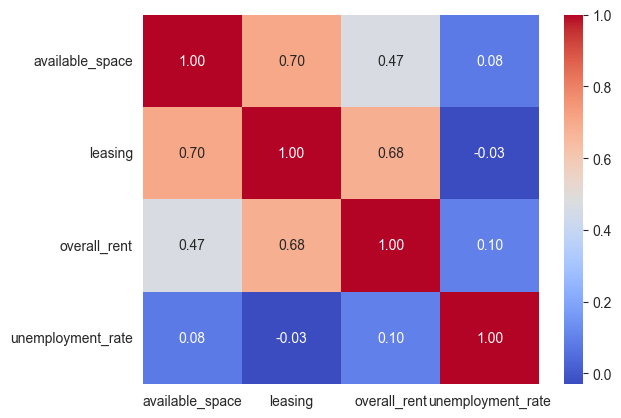

In [10]:

import matplotlib as plt
import seaborn as sns

# Load or prepare your DataFrame

df = pd.read_csv('./data/Leases_join_unemply.csv')

new_df = df[['available_space', 'leasing', 'overall_rent', 'unemployment_rate']]

# Only use numeric columns
numeric_df = new_df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
# plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Heatmap")
plt

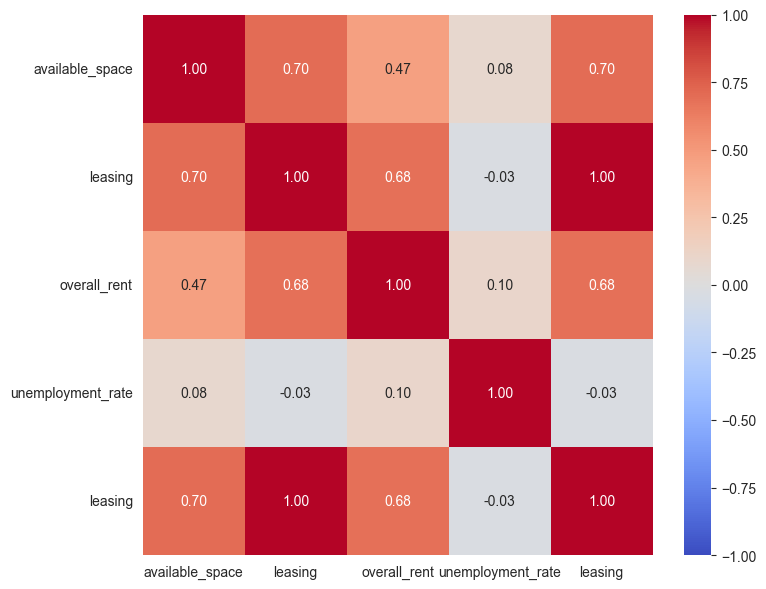

In [12]:
import pandas as pd
import matplotlib.pyplot as plt  # <-- correct import
import seaborn as sns

# Load your DataFrame
df = pd.read_csv('./data/Leases_join_unemply.csv')

# Select specific columns
new_df = df[['available_space', 'leasing', 'overall_rent', 'unemployment_rate', 'leasing']]

# Keep only numeric columns
numeric_df = new_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap with fixed color scale range
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
# plt.title("Correlation Heatmap (Range -1 to 1)")
plt.tight_layout()
plt.show()


In [13]:
# looking what variables has the most missing values
missing_values_count = LJU_df.isnull().sum().sort_values(ascending=False)
missing_values_count

internal_industry                 168284
company_name                      157469
internal_market_cluster           118847
sublet_overall_rent                73011
sublet_internal_class_rent         73011
sublet_availability_proportion     73011
sublet_available_space             73011
direct_overall_rent                73011
direct_available_space             73011
direct_internal_class_rent         73011
direct_availability_proportion     73011
unemployment_rate                  56116
available_space                    49144
RBA                                49144
overall_rent                       49144
availability_proportion            49144
internal_class_rent                49144
leasing                            49144
building_name                      36686
space_type                          7545
monthsigned                          863
transaction_type                     539
internal_class                         9
zip                                    1
year            

### Analysis
Some predictors to consider

* transaction_type (categorical)


In [14]:
LJU_df['transaction_type'].value_counts()


transaction_type
New                      177813
Renewal                    6622
TBD                        4280
Relocation                 3470
Expansion                  1019
Renewal and Expansion       477
Extension                   257
Restructure                 190
Sale - Leaseback             18
Name: count, dtype: int64

Lets remove New since we can

In [15]:
# Step 1: Filter rows where transaction_type is your target value
filtered_transaction_type_New= LJU_df[LJU_df['transaction_type'] == 'New']

# Step 2: Count unique states
unique_state_count = filtered_transaction_type_New['market'].nunique()
print(f"Number of unique states involved in Lease transactions: {unique_state_count}")


Number of unique states involved in Lease transactions: 29


## The most States with the most observations


We found that market has the least missing values

In [17]:
LJU_df['market'].value_counts()

market
Manhattan              16961
Houston                16014
Los Angeles            15571
Dallas/Ft Worth        15272
South Florida          11919
Denver                  8957
Boston                  8236
Atlanta                 7739
Phoenix                 7379
Orange County           7196
San Diego               6326
Chicago Suburbs         6232
Northern Virginia       6086
Seattle                 5344
Chicago                 5140
Austin                  4997
Northern New Jersey     4809
Tampa                   4803
Philadelphia            4406
Washington D.C.         4064
Baltimore               3957
San Francisco           3574
Detroit                 3531
South Bay/San Jose      3401
Charlotte               3363
Southern Maryland       2736
Nashville               2534
Raleigh/Durham          2375
Salt Lake City          1763
Name: count, dtype: int64

The top 5 states that have the most leasing observations
- Manhattan
- Houston
- Los Angeles
- Dallas/Ft Wirth
- South Florida
- Denver


### Lets remove the New and the Manhattan from the top 6 markets

In [19]:
# Step 1: Get the top 6 most frequent markets
top_6_markets = LJU_df['market'].value_counts().nlargest(6).index

# Step 2: Filter the DataFrame for those top markets
top_6_df = LJU_df[LJU_df['market'].isin(top_6_markets)]

# Step 3: Preview
print("Top 6 most frequent markets:")
print(top_6_markets.tolist())

top_6_df.head()


Top 6 most frequent markets:
['Manhattan', 'Houston', 'Los Angeles', 'Dallas/Ft Worth', 'South Florida', 'Denver']


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,unemployment_rate
565,2018,Q1,1.0,Dallas/Ft Worth,10000 NCX,Dallas/Ft Worth_Central Expressway_Dallas_1000...,10000 N Central Expy,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
566,2018,Q1,1.0,Dallas/Ft Worth,1100 East Campbell,Dallas/Ft Worth_Richardson Telecom Corridor_Ri...,1100 E Campbell Rd,South,Richardson,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
567,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
568,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
569,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1


In [20]:
# verify its only the top 6 markets
unique_state_count = top_6_df['market'].nunique()
unique_state_count

6

In [21]:
print("Top 6 most frequent markets:")
for i, market in enumerate(top_6_markets, 1):
    print(f"{i}. {market}")

Top 6 most frequent markets:
1. Manhattan
2. Houston
3. Los Angeles
4. Dallas/Ft Worth
5. South Florida
6. Denver


now lets drop manhattan

In [22]:
top5_frequent_market_df = top_6_df[top_6_df['market'] != 'Manhattan']

top5_frequent_market_df.head()


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,unemployment_rate
565,2018,Q1,1.0,Dallas/Ft Worth,10000 NCX,Dallas/Ft Worth_Central Expressway_Dallas_1000...,10000 N Central Expy,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
566,2018,Q1,1.0,Dallas/Ft Worth,1100 East Campbell,Dallas/Ft Worth_Richardson Telecom Corridor_Ri...,1100 E Campbell Rd,South,Richardson,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
567,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
568,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
569,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1


In [23]:
top5_frequent_market_df ['market'].value_counts()

market
Houston            16014
Los Angeles        15571
Dallas/Ft Worth    15272
South Florida      11919
Denver              8957
Name: count, dtype: int64

In [35]:
top5_frequent_market_df['space_type'].value_counts()

space_type
Relet     59581
Sublet     5137
New        2082
Name: count, dtype: int64

`space_type` describes the nature of the lease

In [36]:
space_type_counts = (
    top5_frequent_market_df
    .groupby(['market', 'space_type'])
    .size()
    .reset_index(name='count')
    .sort_values(['market', 'count'], ascending=[True, False])
)

print(space_type_counts)


             market space_type  count
1   Dallas/Ft Worth      Relet  13474
2   Dallas/Ft Worth     Sublet   1131
0   Dallas/Ft Worth        New    522
4            Denver      Relet   7746
5            Denver     Sublet    794
3            Denver        New    279
7           Houston      Relet  14135
8           Houston     Sublet   1096
6           Houston        New    420
10      Los Angeles      Relet  13710
11      Los Angeles     Sublet   1350
9       Los Angeles        New    457
13    South Florida      Relet  10516
14    South Florida     Sublet    766
12    South Florida        New    404


Relet indicates previously leased to one tenant now leased to a different tenant

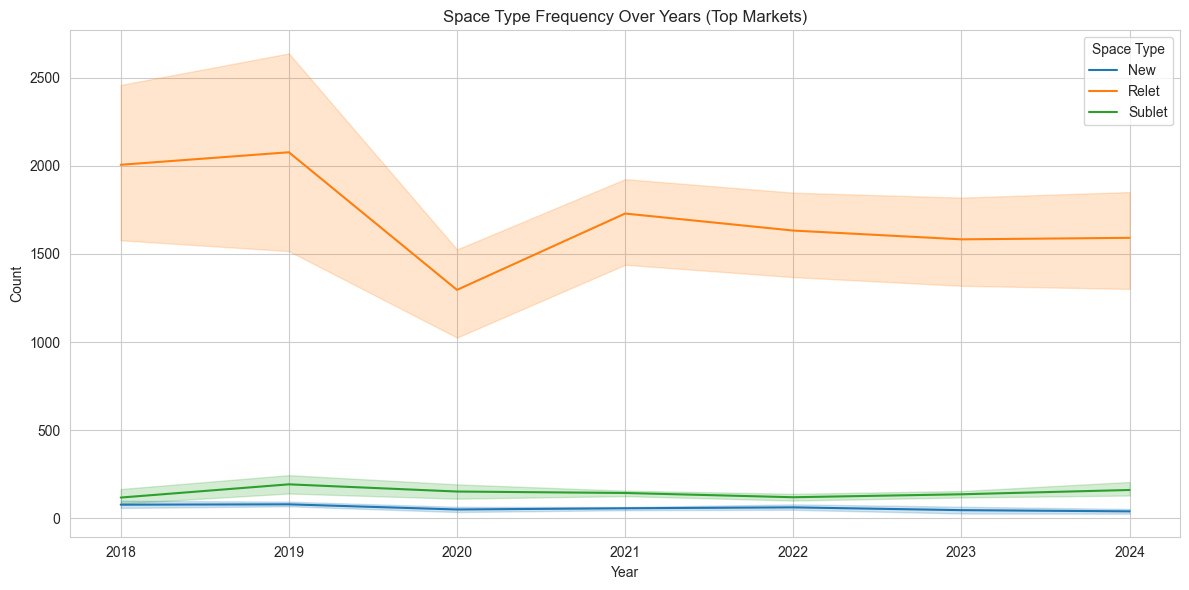

In [42]:
space_type_yearly_counts = (
    top5_frequent_market_df
    .groupby(['market', 'year', 'space_type'])
    .size()
    .reset_index(name='count')
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=space_type_yearly_counts, x='year', y='count', hue='space_type')
plt.title("Space Type Frequency Over Years (Top Markets)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Space Type")
plt.tight_layout()
plt.show()


In [47]:
highly_correlated_vars = ["available_space", "overall_rent", "unemployment_rate", "leasing"]
child_df = df[highly_correlated_vars]



,available_space,overall_rent,unemployment_rate,leasing
0,20239067.0,24.345689,4.3,1205126.0
1,20239067.0,24.345689,4.3,1205126.0
2,20239067.0,24.345689,4.3,1205126.0
3,12728989.0,24.345689,4.3,715742.0
4,20239067.0,24.345689,4.3,1205126.0
